Importación de librerías.

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.ndimage as ndimage
%matplotlib inline

Codigo para simular los datos proveído por el profesor.

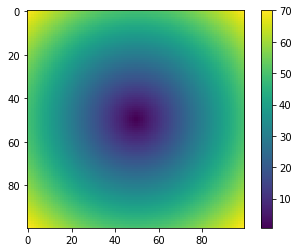

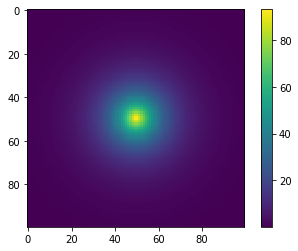

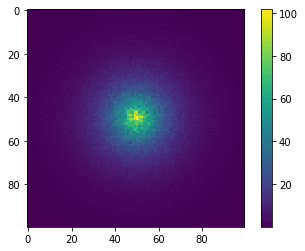

In [90]:
# Creamos un array con ceros, los cuales serán substituidos
# con el modelo de brillo
a = np.zeros([100,100])
x = np.arange(100)
y = np.arange(100)
# yy,xx son vectores que, emparejados, representan todas las posibles
# coordenadas (x,y) de cada pixel en el mapa
yy,xx = np.meshgrid(x,y)
# definimos la posición central del array en pixels
xc,yc = 49.5,49.5
# calculamos la distancia desde el origen hasta cada pixel
R = np.sqrt((xx-xc)**2 + (yy-yc)**2)
# graficamos el mapa de radios R para ver si es lo esperado
plt.imshow(R)
plt.colorbar()
plt.show()

# ahora creamos un modelo de masa basado en un perfil exponencial
masa = 100*np.exp(-R/10)

# graficamos para confirmar
plt.imshow(masa)
plt.colorbar()
plt.show()

# Finalmente, perturbamos el mapa para que en un principio
# no sea perfectamente axisimétrico
masa = masa * np.random.normal(loc=1,scale=0.1,size=masa.shape)

# graficamos para confirmar
plt.imshow(masa)
plt.colorbar()
plt.show()

Lectura de los datos

In [17]:
mp = pd.read_csv('./mapa.txt', sep=' ', header=None)

In [355]:
#mp

Gráfica como pixeles, representación en una imágen utilizando cada valor en el arreglo matricial como el nivel de intensidad de un pixel.

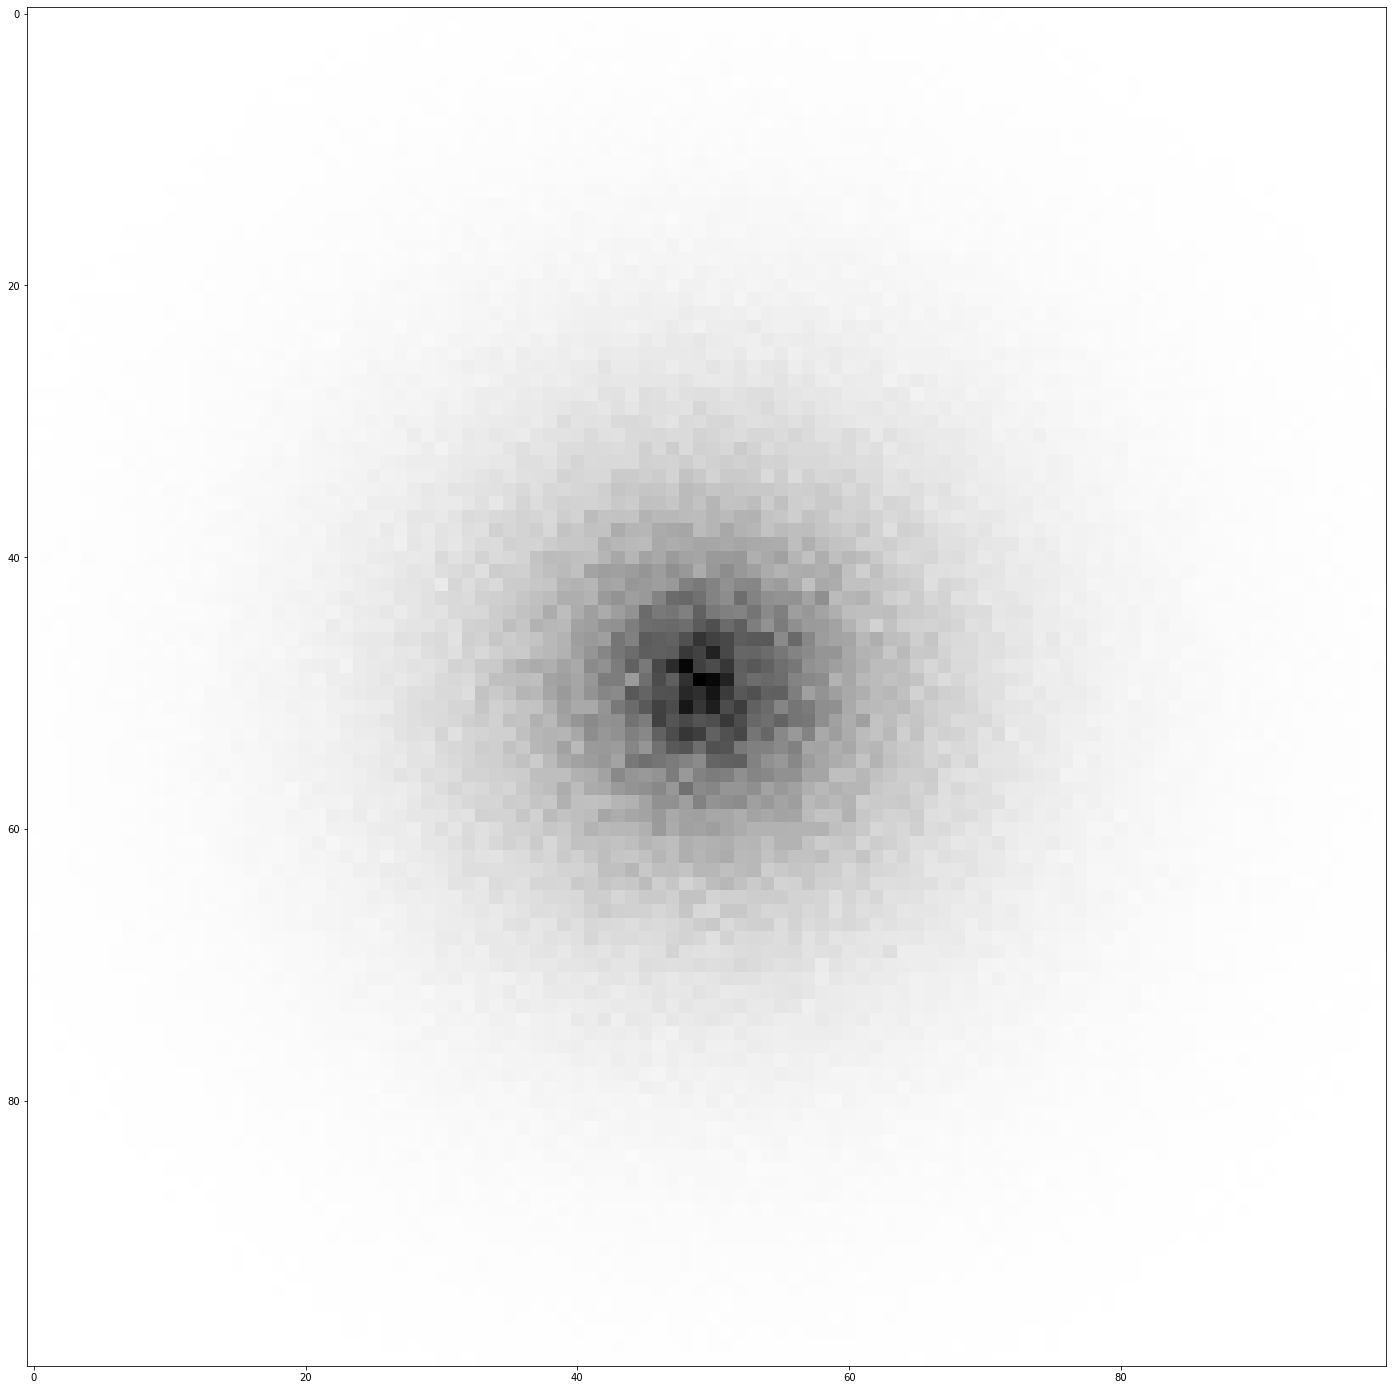

In [325]:
fig, ax = plt.subplots(figsize=(25, 25))
plt.imshow(mp.values, cmap='binary')
plt.show()

Gráfica como contornos de isodensidad.

Text(0.5, 1.0, 'Contour plot')

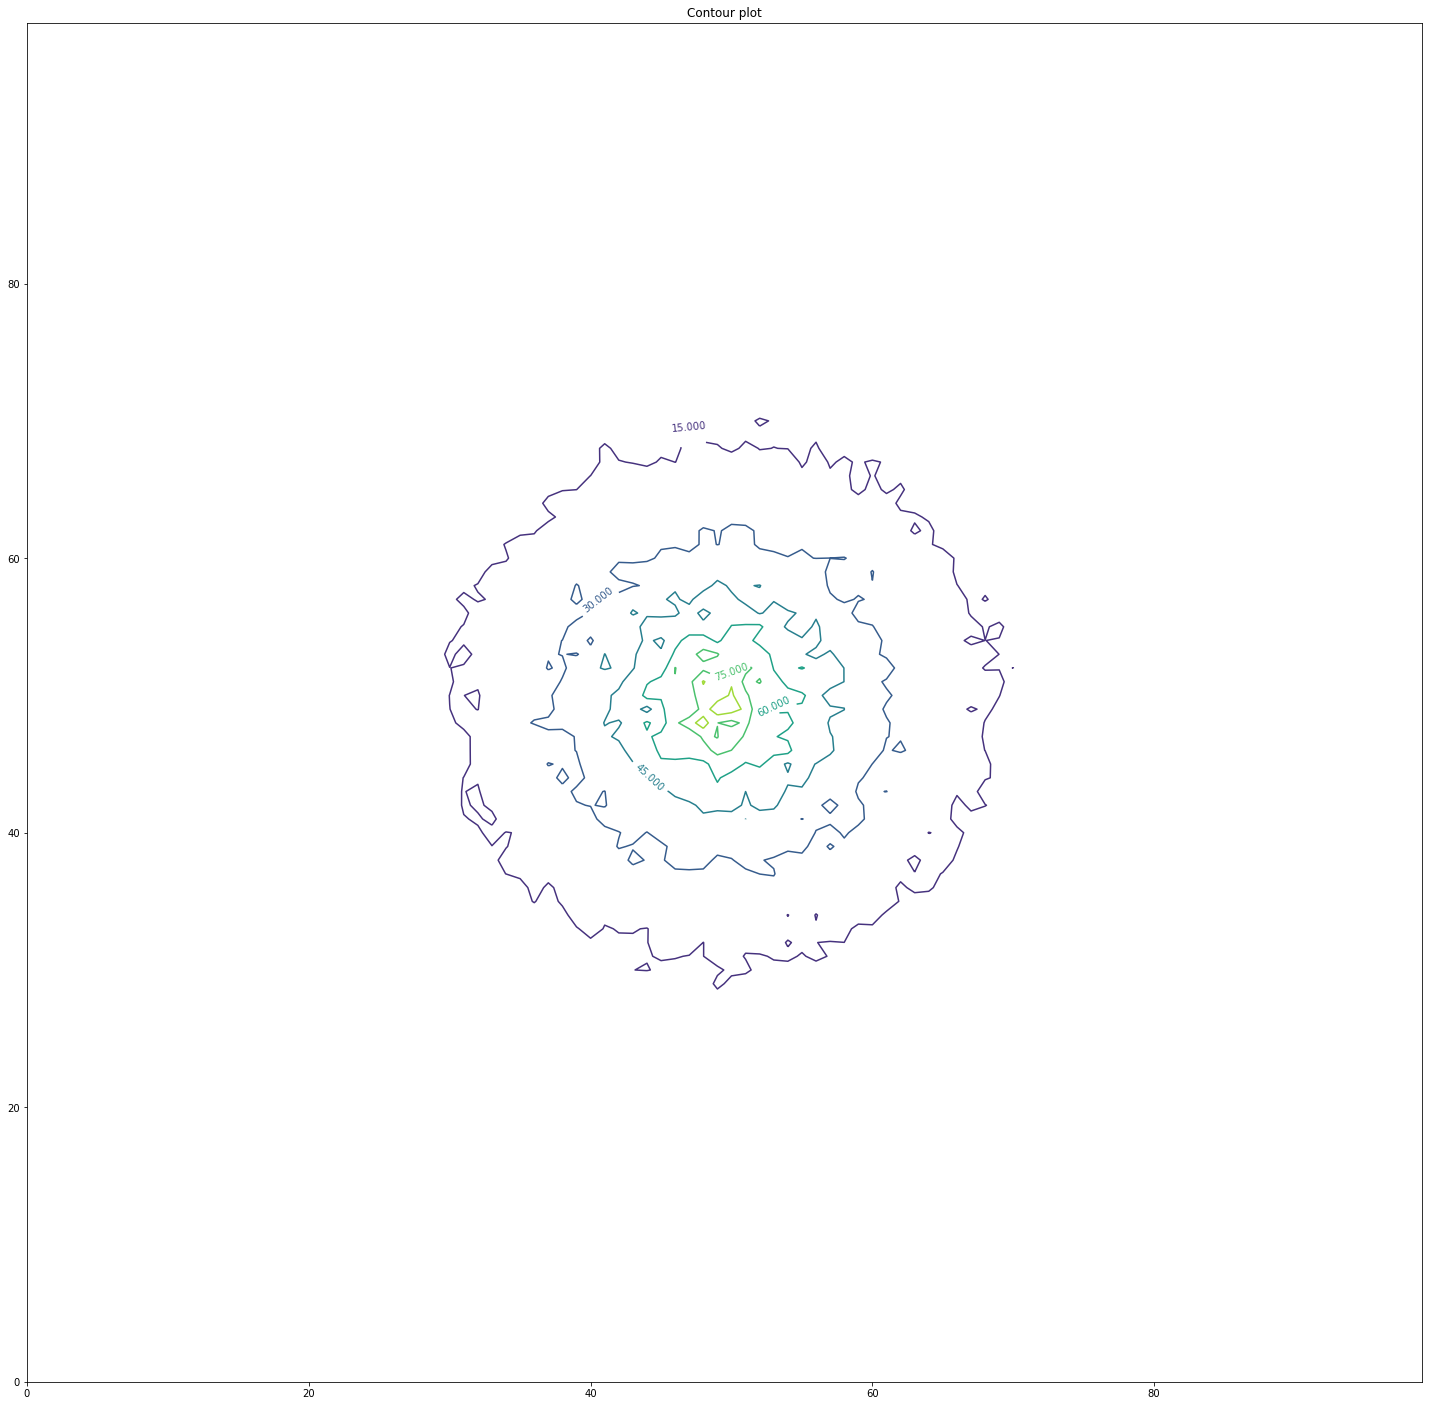

In [77]:
fig, ax = plt.subplots(figsize=(25, 25))
CS = ax.contour(mp.values)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot')

Mapa de Contornos con mayor escala de niveles de intensidad.

Text(0.5, 1.0, 'Contour plot')

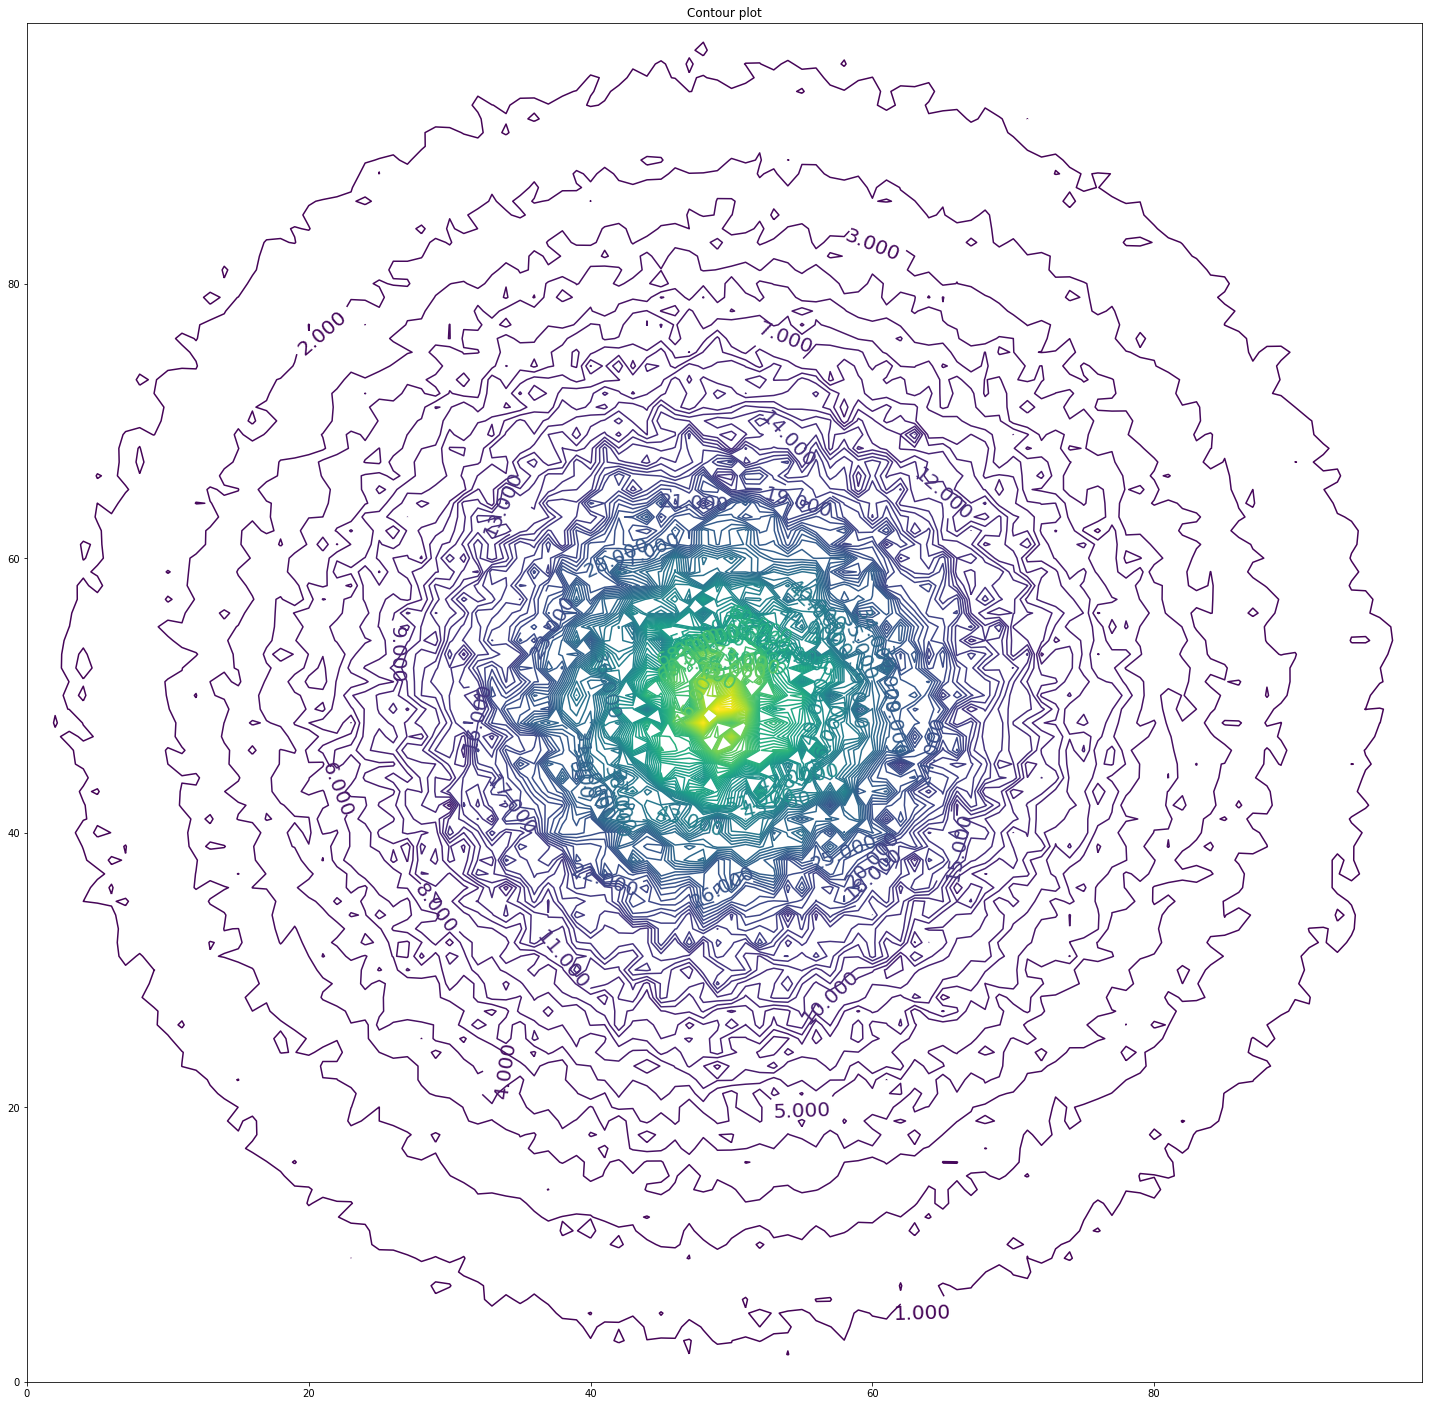

In [89]:
fig, ax = plt.subplots(figsize=(25, 25))
levels=range(int(mp.values.min()),int(mp.values.max()))
CS = ax.contour(mp.values,levels=levels)
ax.clabel(CS, inline=True, fontsize=20)
ax.set_title('Contour plot')

In [106]:
cx = (mp.values.shape[0]-1)/2 #centros
cy = (mp.values.shape[1]-1)/2

In [356]:
dist = np.zeros((mp.values.shape[0],mp.values.shape[1])) #matriz distancias de pixeles
for i in range(mp.values.shape[0]):
    for j in range(mp.values.shape[1]):
        #print(i-cx,j-cy, np.sqrt((i-cx)**2+(j-cy)**2))
        dist[i][j] = np.sqrt((i-cx)**2+(j-cy)**2)
#print(dist)

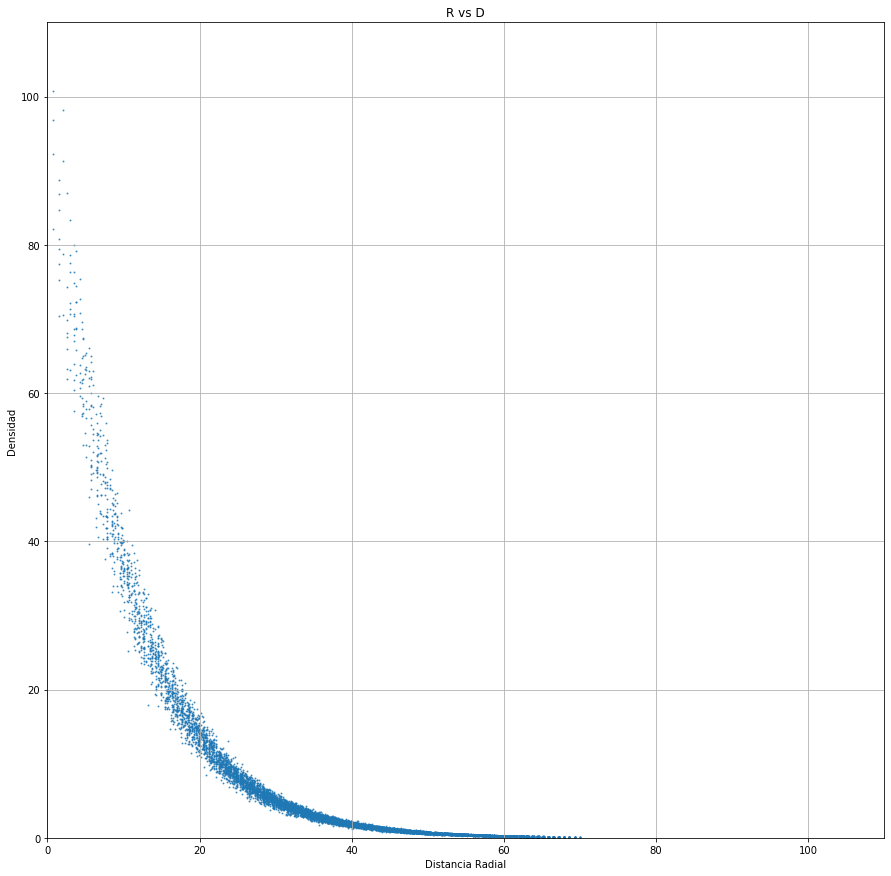

In [144]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.grid(True)
plt.xlim(0,110)
plt.ylim(0,110)

plt.xlabel('Distancia Radial')
plt.ylabel('Densidad')
plt.title('R vs D')

plt.scatter(dist,mp.values,1.0,alpha=0.7)

En esta parte calculo los radios o distancias.

In [162]:
distances, values = [],[]
for i in range(mp.values.shape[0]):
    for j in range(mp.values.shape[1]):
        #print(dist[i][j])
        distances.append(dist[i][j])
        values.append(mp.values[i][j])

In [166]:
len(distances)

10000

In [343]:
distan = list(set(distances))
print(len(distan))

921


En esta parte puedo observar que tengo 921 valores únicos de radios, entonces construiré un diccionario invertido que me permita agrupar los valores de intensidad en todas las distancias equivalentes, de esta manera calcularé el promedio sobre los valores agrupados y así convierto los valores simétricos.

In [357]:
result = map(lambda x,y: {str(x):y},distances,values)
result = list(result)
#print(result)

In [194]:
prom = {}
for d in distan:
    val = [] #values per distance
    for e in result:
        try:
            val.append(e[str(d)])
        except:
            None
    prom.update({d:val})
for k,v in prom.items():
    prom.update({k:np.mean(v)})

La nueva matriz calculada la llamaré prom_r

In [207]:
prom_r = np.zeros((mp.values.shape[0],mp.values.shape[1])) #matriz distancias de pixeles
for i in range(mp.values.shape[0]):
    for j in range(mp.values.shape[1]):
        #print(prom[dist[i][j]])
        prom_r[i][j] = prom[dist[i][j]]

Text(0.5, 1.0, 'Contour plot')

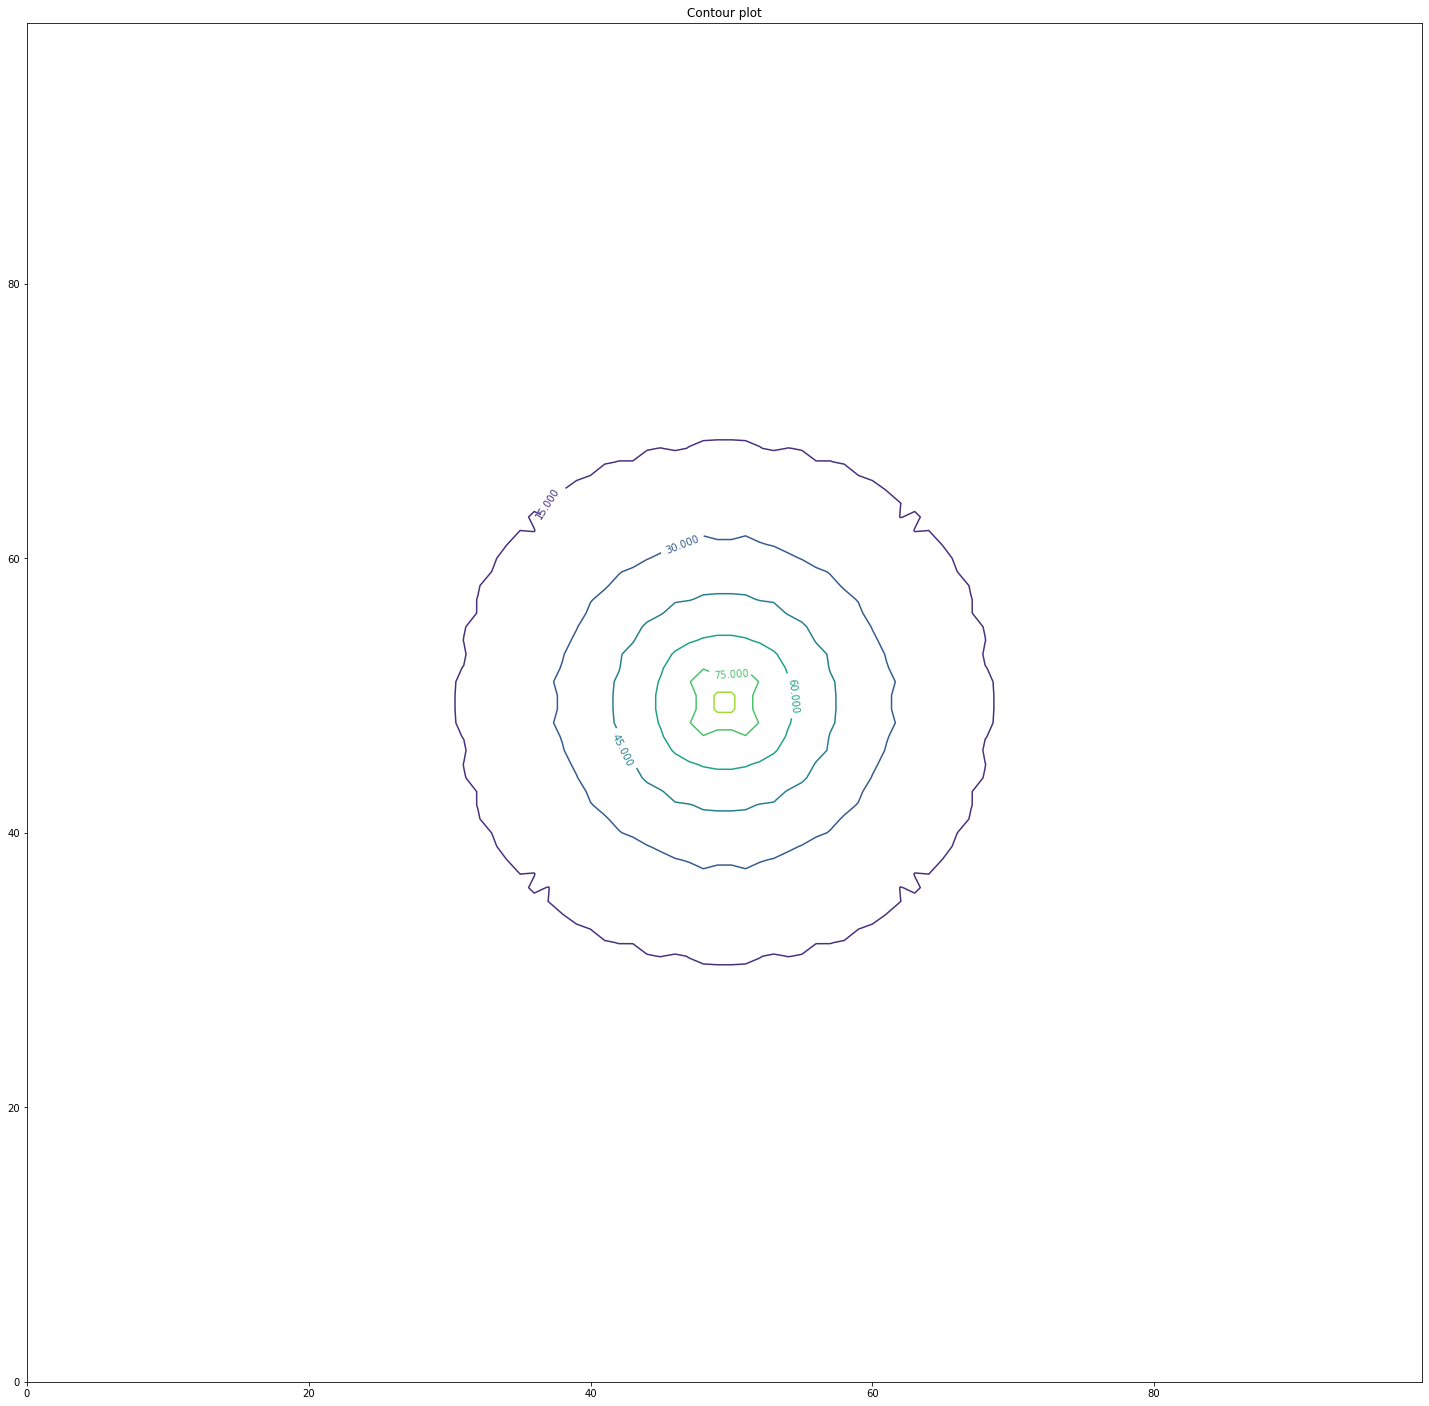

In [208]:
fig, ax = plt.subplots(figsize=(25, 25))
CS = ax.contour(prom_r)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot')

Text(0.5, 1.0, 'Contour plot')

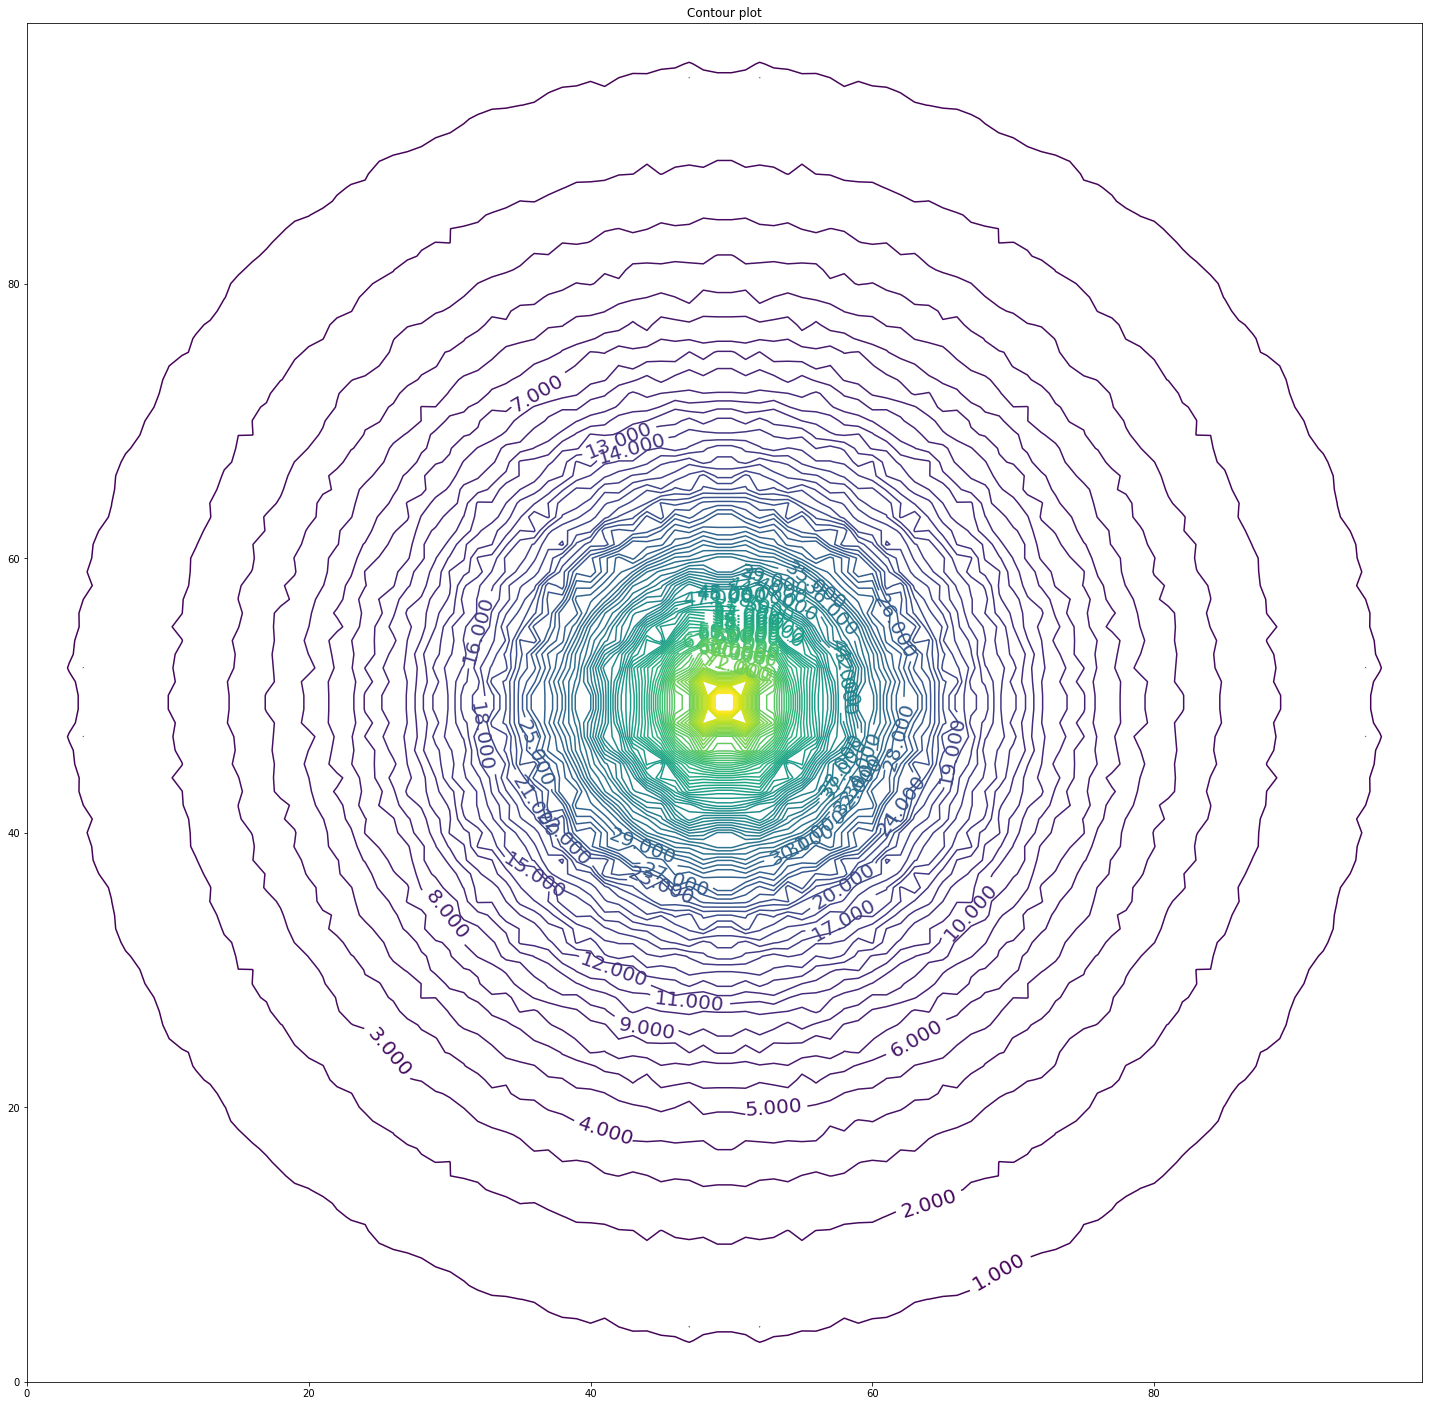

In [354]:
fig, ax = plt.subplots(figsize=(25, 25))
levels=range(int(prom_r.min()),int(prom_r.max()))
CS = ax.contour(prom_r,levels=levels)
ax.clabel(CS, inline=True, fontsize=20)
ax.set_title('Contour plot')

De esta manera vemos que se ve reflejada una mayor simetria tanto en el mapa de contornos como en la imágen de pixeles.

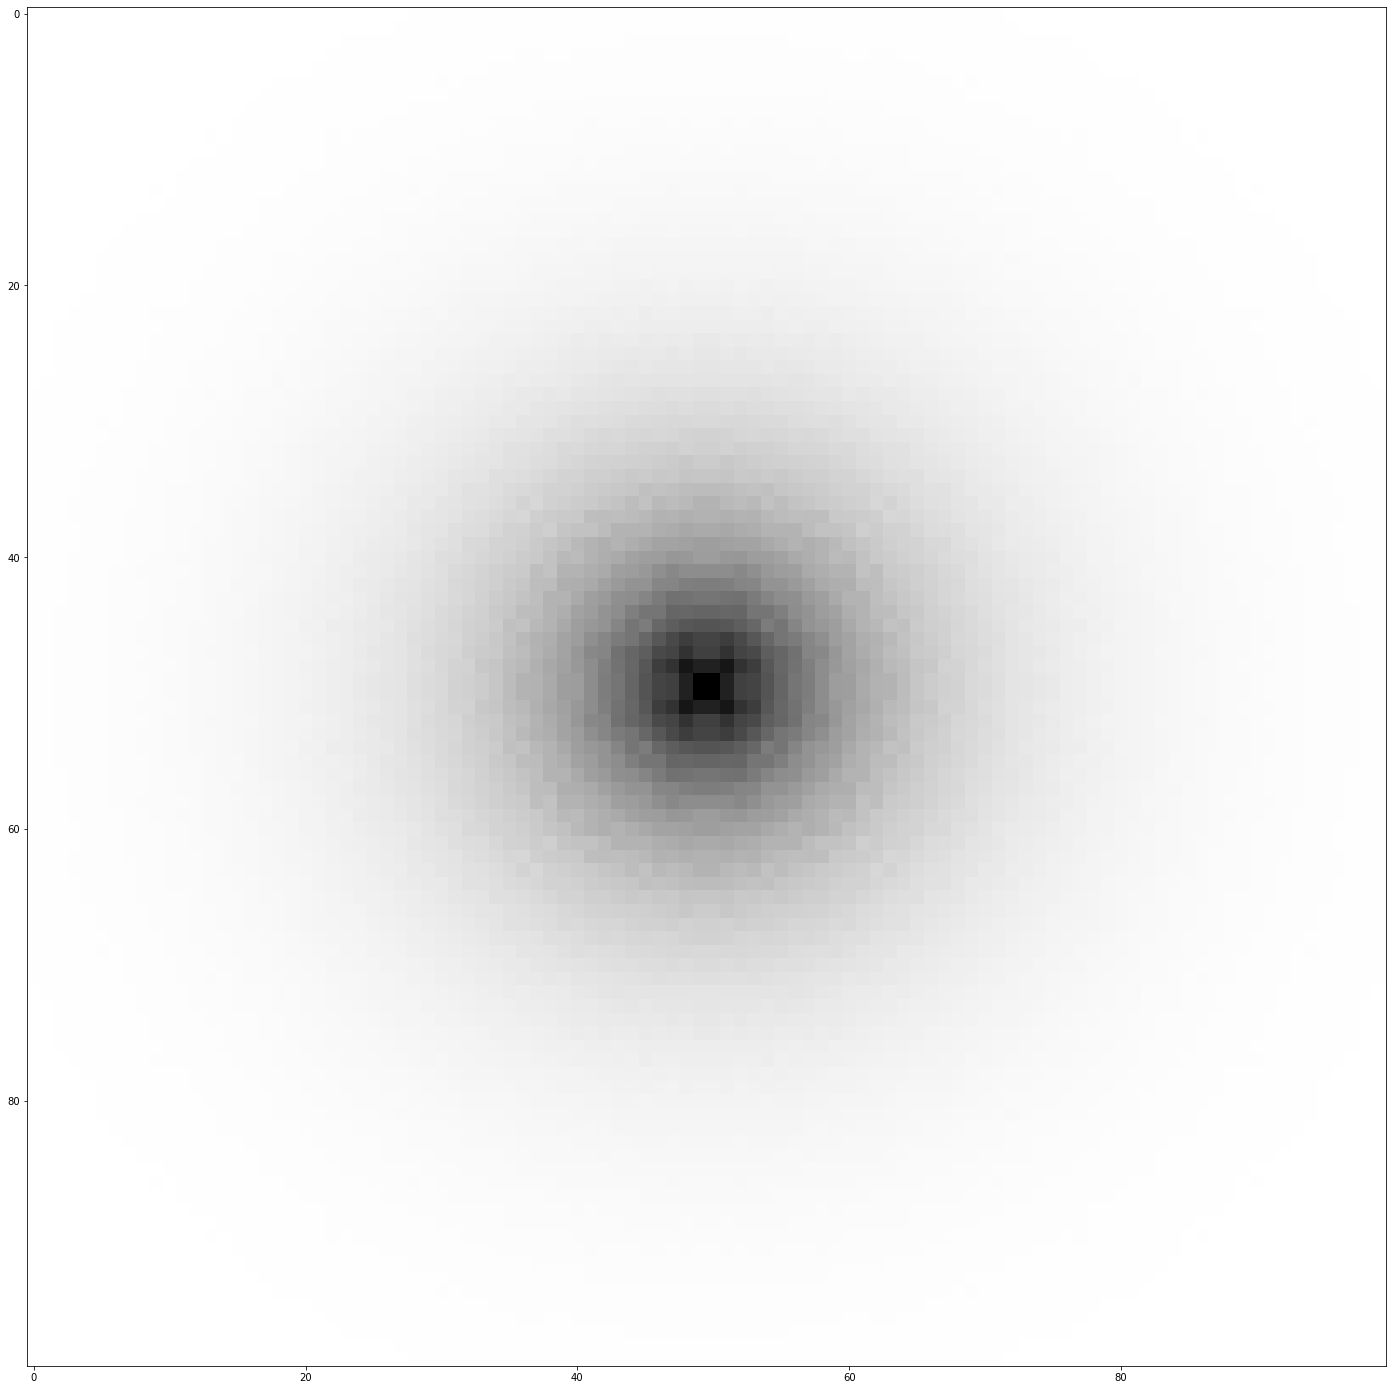

In [324]:
fig, ax = plt.subplots(figsize=(25, 25))
plt.imshow(prom_r, cmap='binary')
plt.show()

In [348]:
int((mp.values.shape[0])/2)

50

In [360]:
prom_r2 = np.zeros((int(mp.values.shape[0]/2),int(mp.values.shape[1]/2))) 
for i in range(int(mp.values.shape[0]/2)):
    for j in range(int(mp.values.shape[1]/2)):
        #print(prom[dist[i][j]])
        prom_r2[i][j] = (mp.values[2*i][2*j]+ mp.values[2*i+1][2*j+1])/2

Text(0.5, 1.0, 'Contour plot')

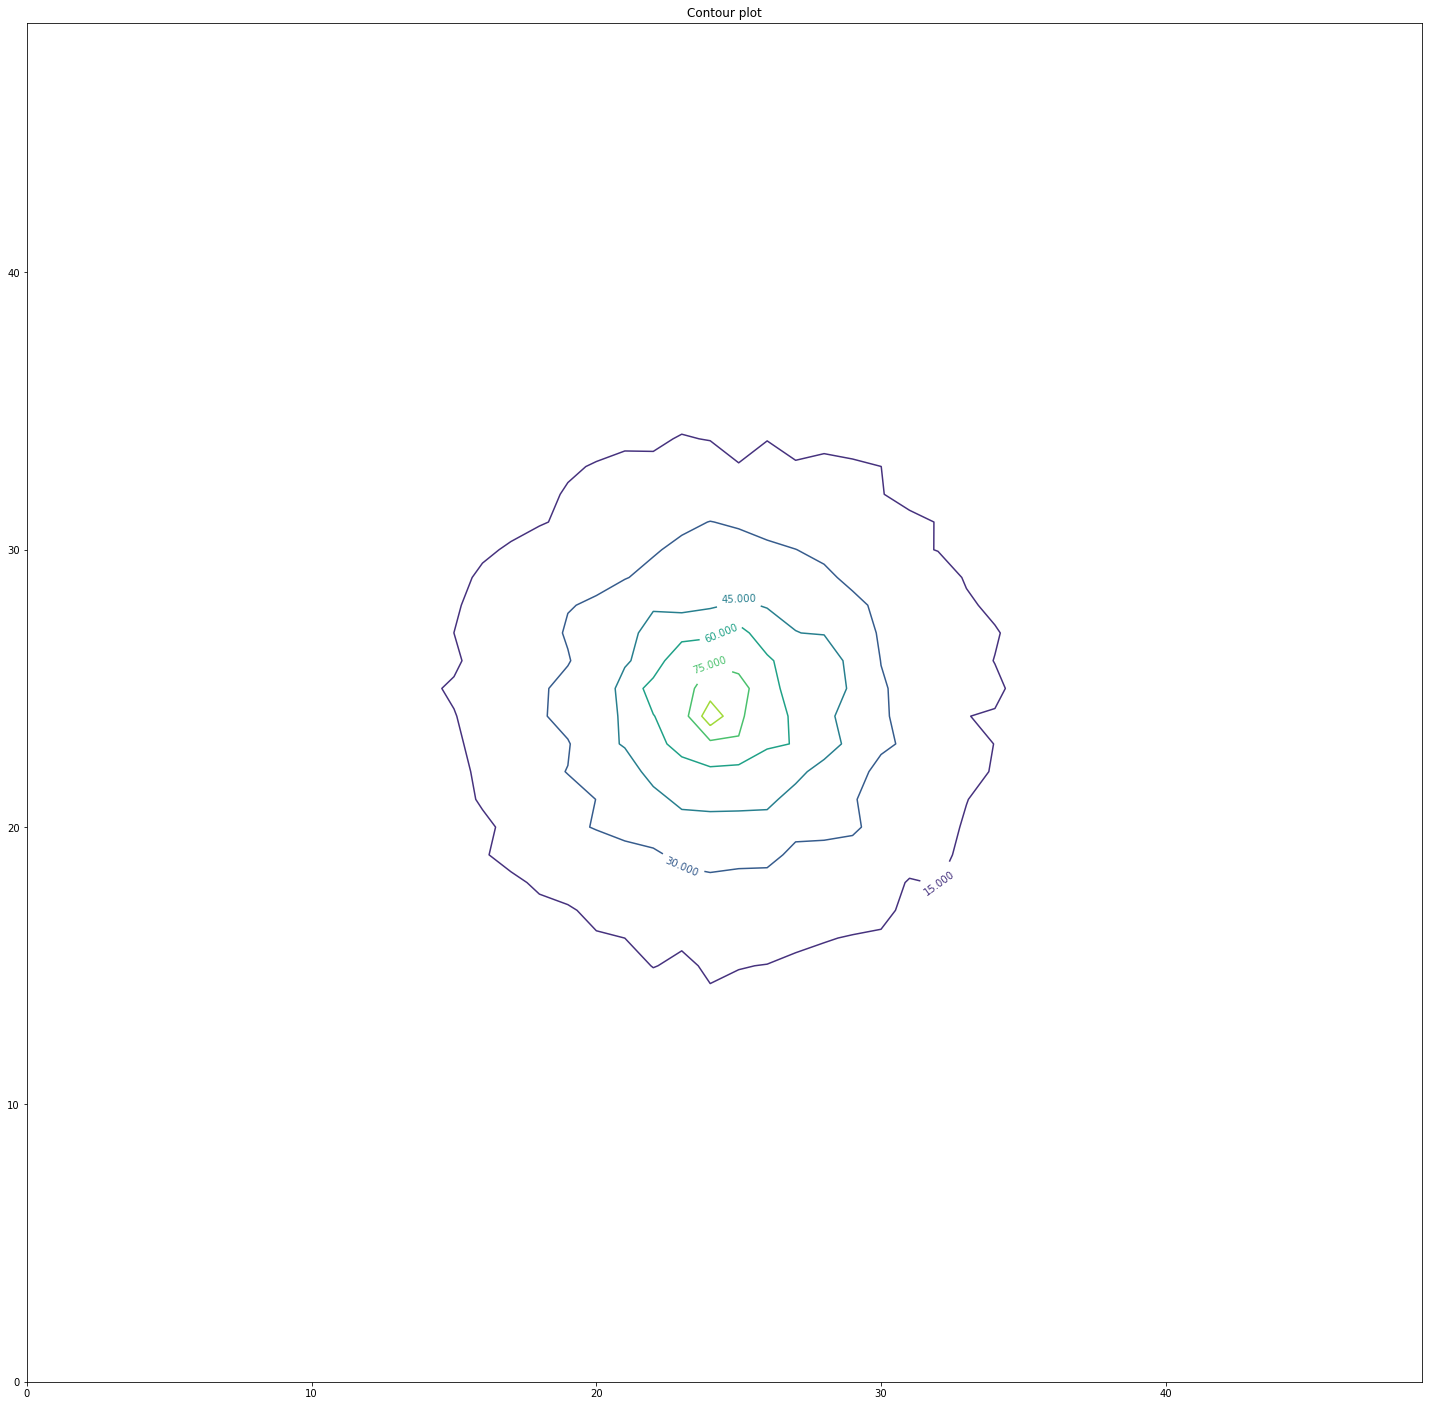

In [361]:
fig, ax = plt.subplots(figsize=(25, 25))
CS = ax.contour(prom_r2)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot')

Text(0.5, 1.0, 'Contour plot')

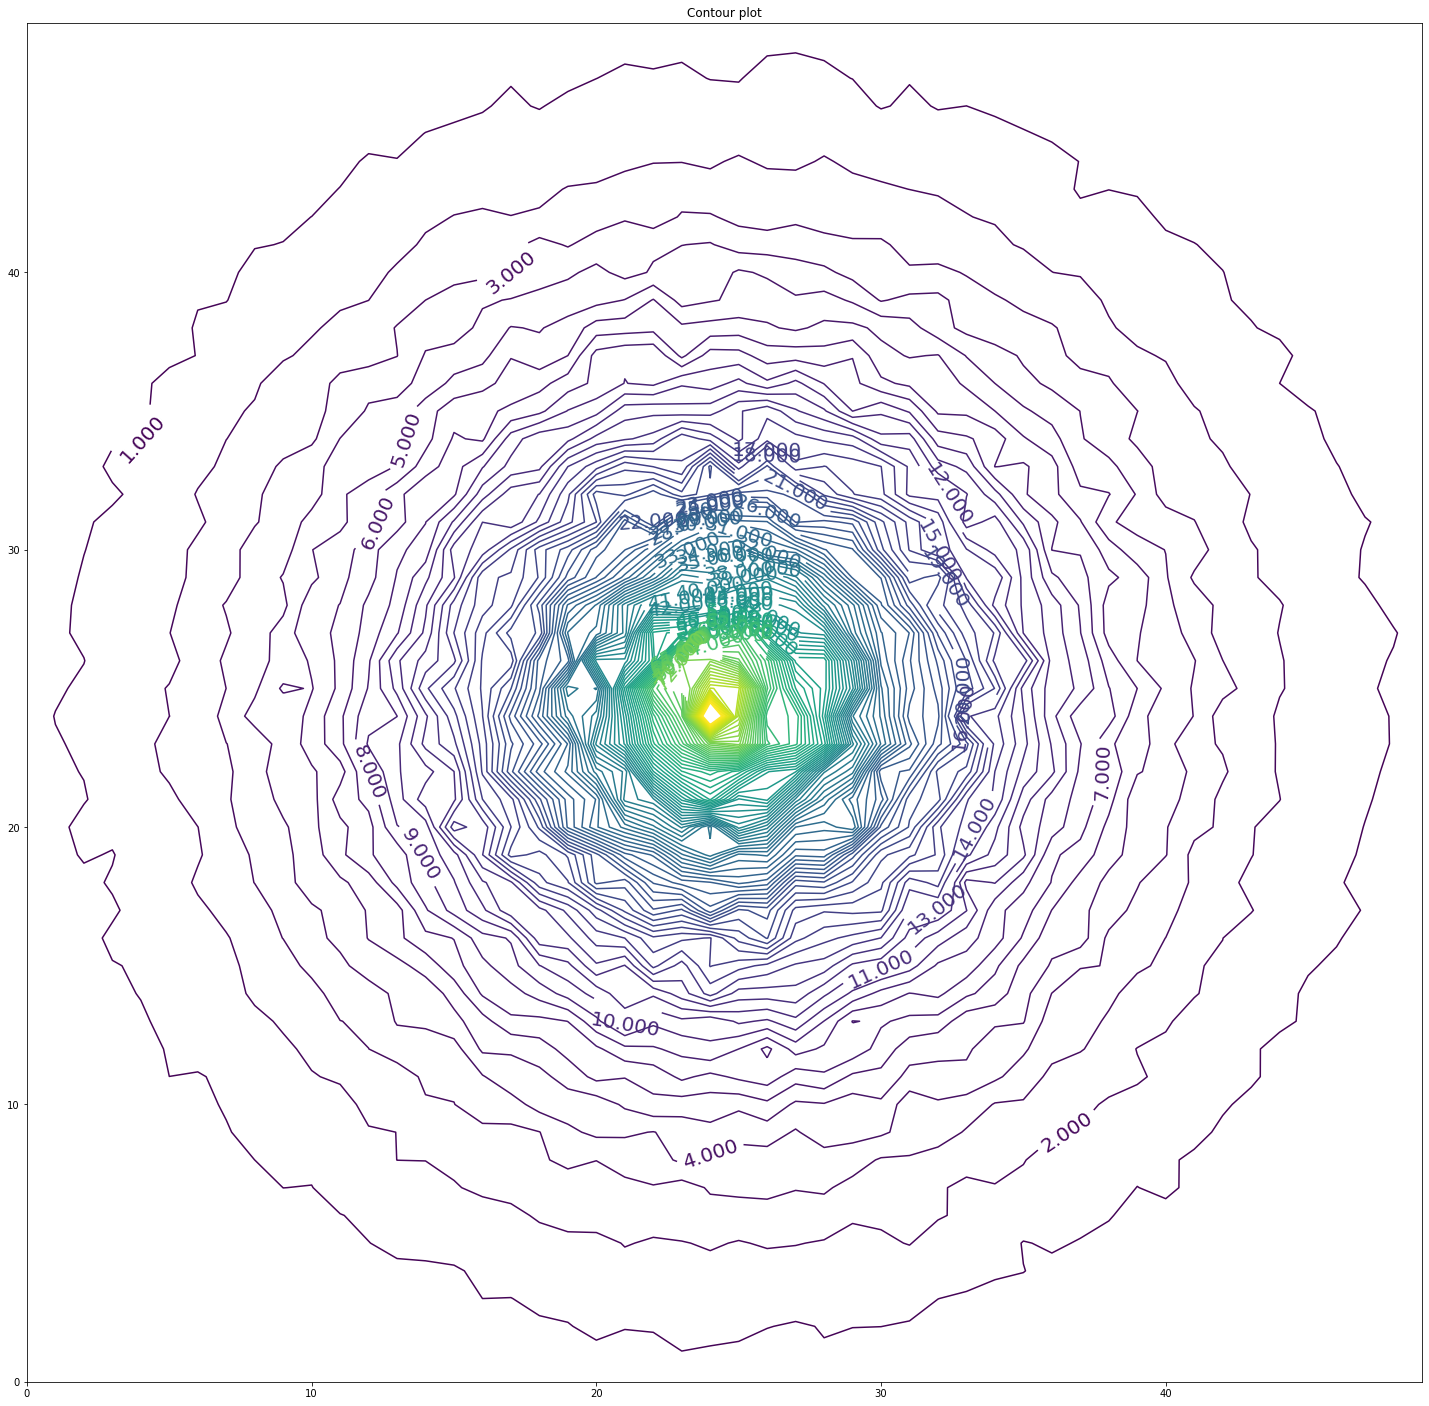

In [370]:
fig, ax = plt.subplots(figsize=(25, 25))
levels=range(int(prom_r.min()),int(prom_r.max()))
CS = ax.contour(prom_r2,levels=levels)
ax.clabel(CS, inline=True, fontsize=20)
ax.set_title('Contour plot')

Entonces mejor utilicé una covolución aplicando un filtro gausiano de tamaño 3

Text(0.5, 1.0, 'Contour plot')

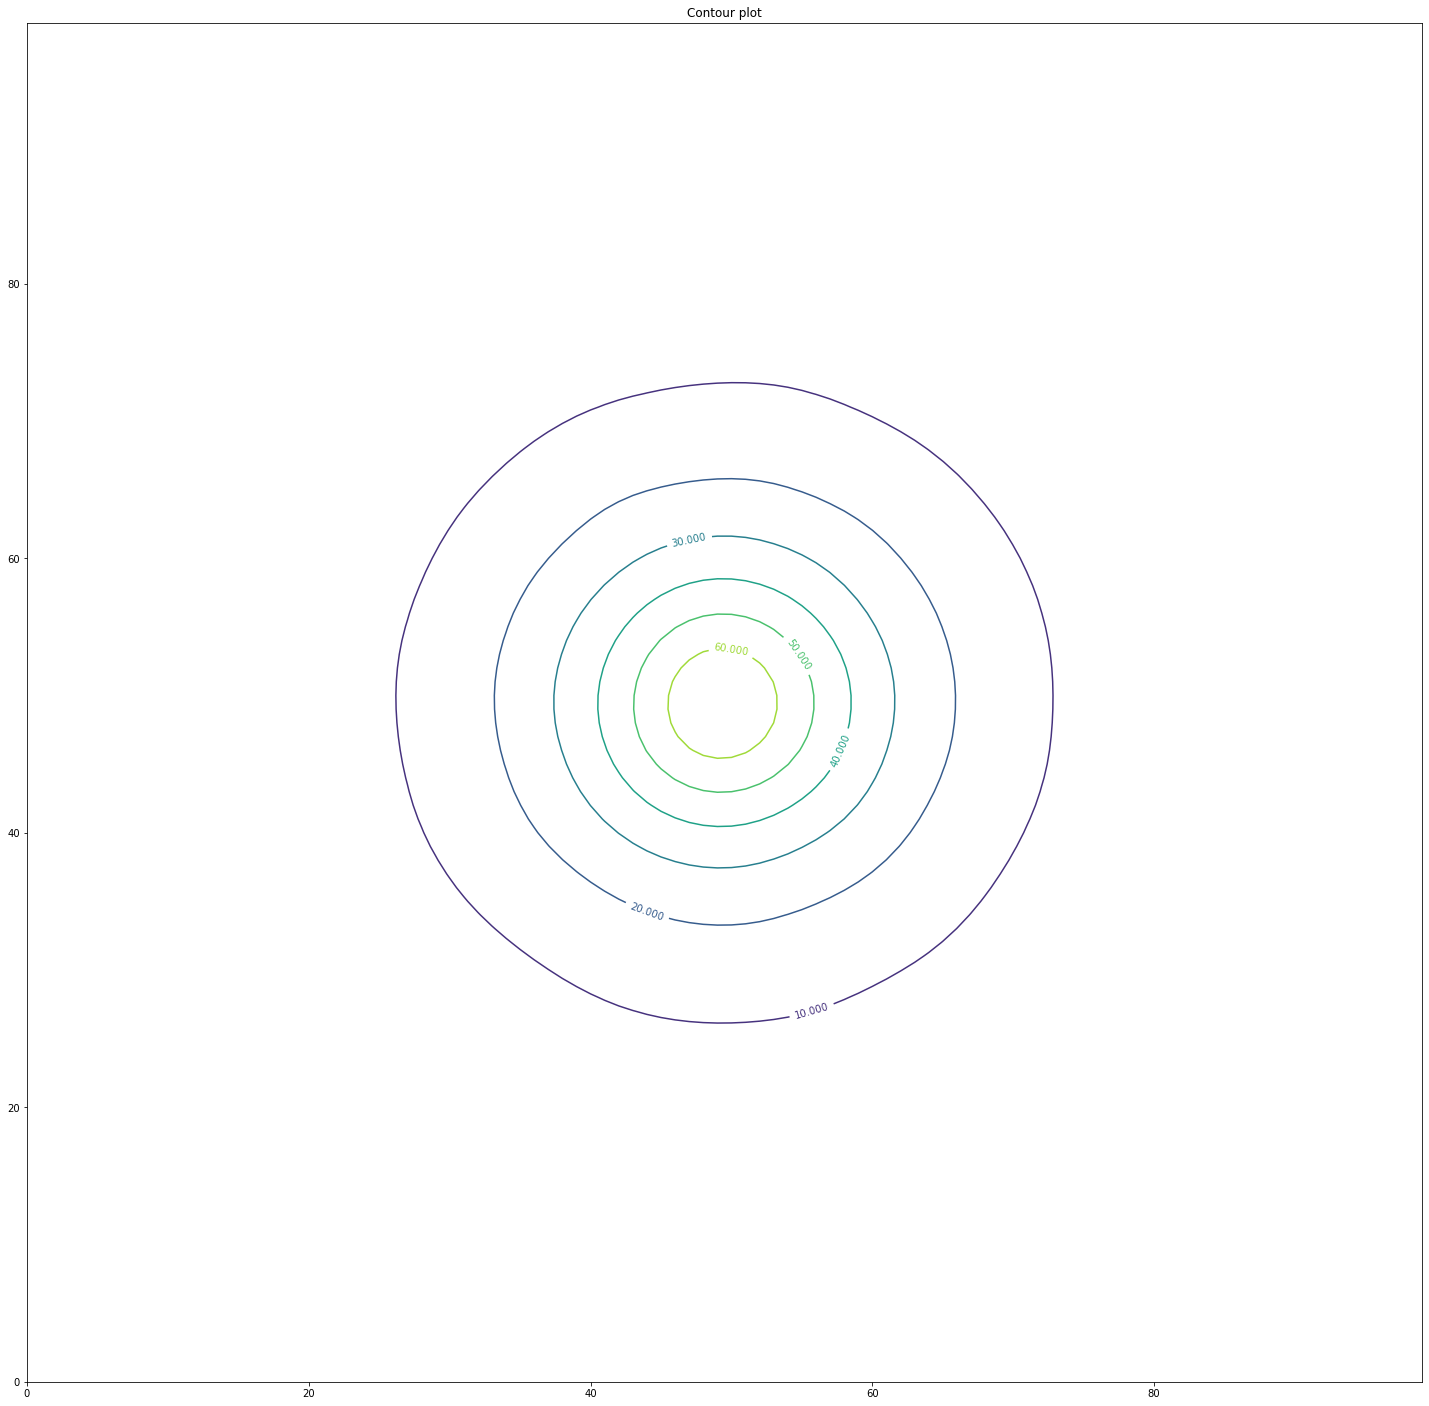

In [378]:
convolucionada = ndimage.gaussian_filter(mp.values, sigma=(3, 3), order=0)
fig, ax = plt.subplots(figsize=(25, 25))
CS = ax.contour(convolucionada)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot')

Text(0.5, 1.0, 'Contour plot')

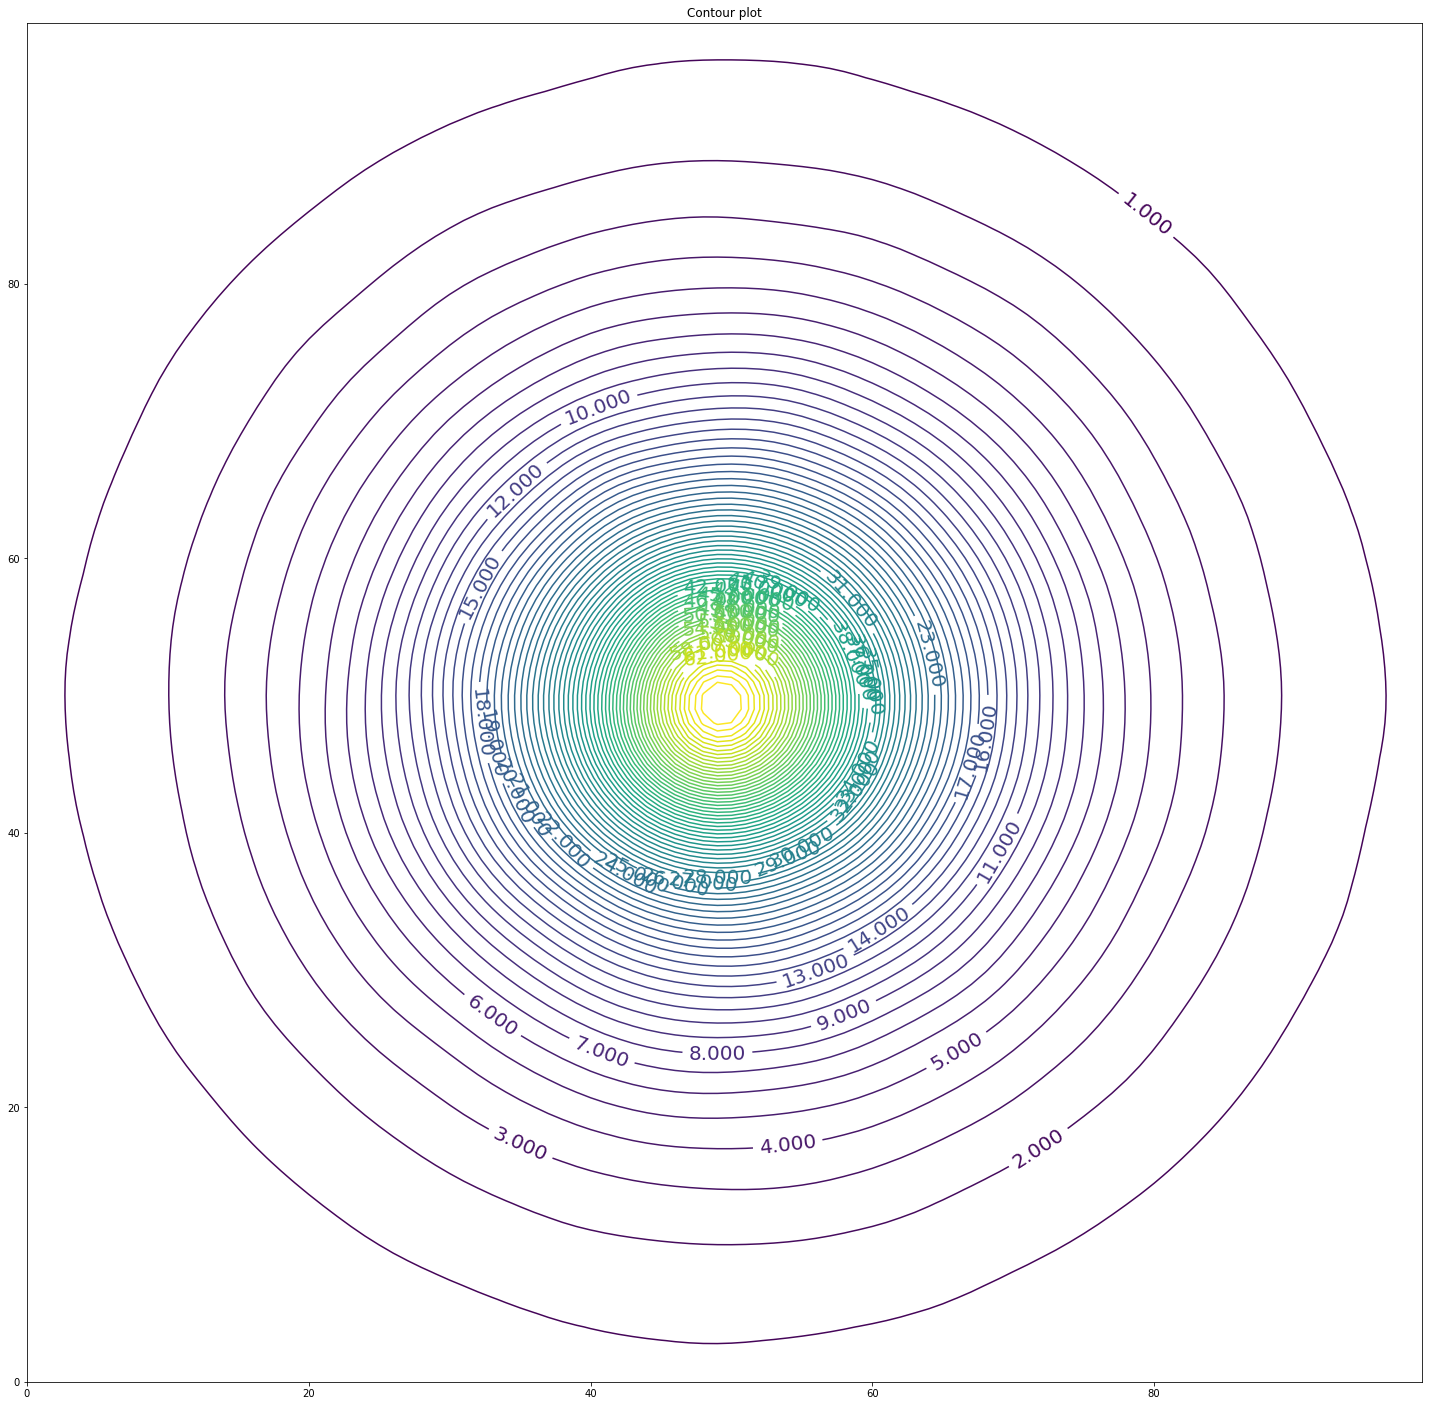

In [379]:
fig, ax = plt.subplots(figsize=(25, 25))
levels=range(int(convolucionada.min()),int(convolucionada.max()))
CS = ax.contour(convolucionada,levels=levels)
ax.clabel(CS, inline=True, fontsize=20)
ax.set_title('Contour plot')

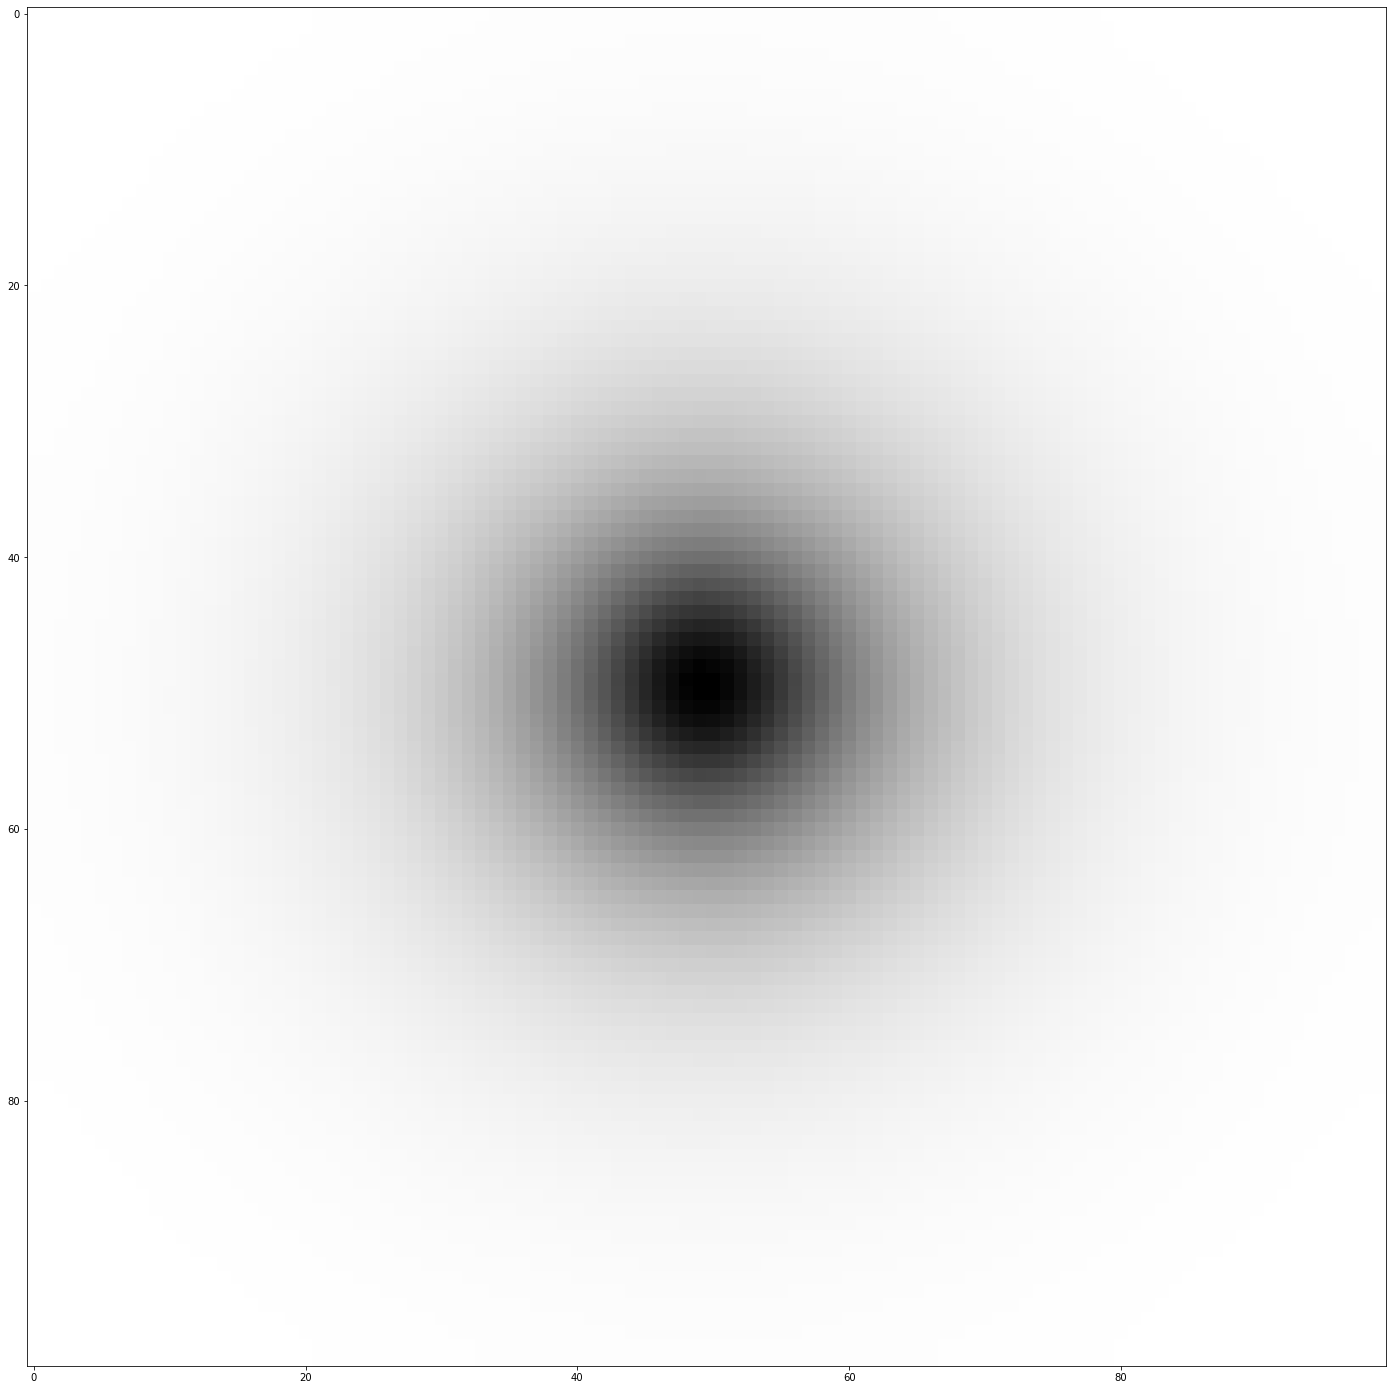

In [380]:
fig, ax = plt.subplots(figsize=(25, 25))
plt.imshow(convolucionada, cmap='binary')
plt.show()

Apartir de este punto "prom_r" será igual a "convolucionada".

In [383]:
prom_r = convolucionada

De el cuarto punto entendí que lo que se hacía era cálcular en $\Sigma(r')$ era la sumatoria de las intensidades al rededor del punto sobre el eje $x$, entonces los valores menores al punto a evaluar son negativos y los puntos mayores al punto a evaluar son positivos.
Creo que apartir de este punto los resultados presentan incongruencias dado que estoy confundido con el modelo, quisiera preguntar si el cálculo del  $\Sigma(r')$ es como lo plantee (evidentemente no lo es) o qué debería corregir para que este sea bien calculado. Muchas gracias.

In [384]:
def sigma_rp(rp): #esta funciion me calcula el sigma rp en función del radio al que se calcule.
    s = 0
    for r,val in zip(dist[50][50:],prom_r[50][50:]):
        if r<rp:
            s=s-val
        else:
            s=s+val
    return s

Vamos a calcular el perfil radial con el método de integración que se encuentra implementado en el módulo integrate de scipy, para ello construimos la función $f(x)$ a integrar

In [385]:
def fun_integrar(rp,r):
    if (rp-r)<0.001:
        f=(sigma_rp(rp)/1000)
    else:
        f = (sigma_rp(rp)/np.sqrt((rp**2)+(r**2)-2*rp*r))
    return f


utilizando trapecios compuestos $$I=\sum_{i=0}^{n-1}I_i=[f(x_0)+2f(x_1)+2f(x_2)+\dots +2f(x_{n-1}+f(x_n)]\frac{h}{2}$$

In [386]:
def perfil_radial(r):
    integral=0
    for i,rp in enumerate(dist[50][50:]):
        if i == 0:
            I = fun_integrar(rp,r)
        elif i == 49:
            I = fun_integrar(rp,r)
        else:
            I = 2*fun_integrar(rp,r)
        integral=integral+I
    return integral*0.5

In [387]:
perf_rad_x = []
for r in dist[50][50:]:
    perf_rad_x.append(perfil_radial(r))

In [388]:
perf_rad_x

[571.6726510037479,
 88.05293901003334,
 -270.3254701941767,
 -591.4212590126903,
 -884.417491848622,
 -1151.7732806590411,
 -1394.9174676183113,
 -1615.149554640804,
 -1813.8222058943602,
 -1992.3725258715301,
 -2152.2982001008713,
 -2295.0993405280838,
 -2422.209364378841,
 -2534.9382996324866,
 -2634.447887345737,
 -2721.758077170668,
 -2797.7730014318067,
 -2863.310226810209,
 -2919.122983319364,
 -2965.9137861153085,
 -3004.342041597645,
 -3035.026300253891,
 -3058.5403086981337,
 -3075.402663618133,
 -3086.064097618593,
 -3090.898568813383,
 -3090.2029950666424,
 -3084.205280060873,
 -3073.075174220015,
 -3056.9315034138126,
 -3035.8418902406506,
 -3009.815534893352,
 -2978.7925788767857,
 -2942.633008553533,
 -2901.1051475503396,
 -2853.871214089403,
 -2800.4658254406627,
 -2740.2636187180606,
 -2672.4305416874845,
 -2595.8501071267797,
 -2509.008356914674,
 -2409.8078483231707,
 -2295.2534555809766,
 -2160.890248080185,
 -1999.7142759149933,
 -1799.8153027560932,
 -1538.3954970

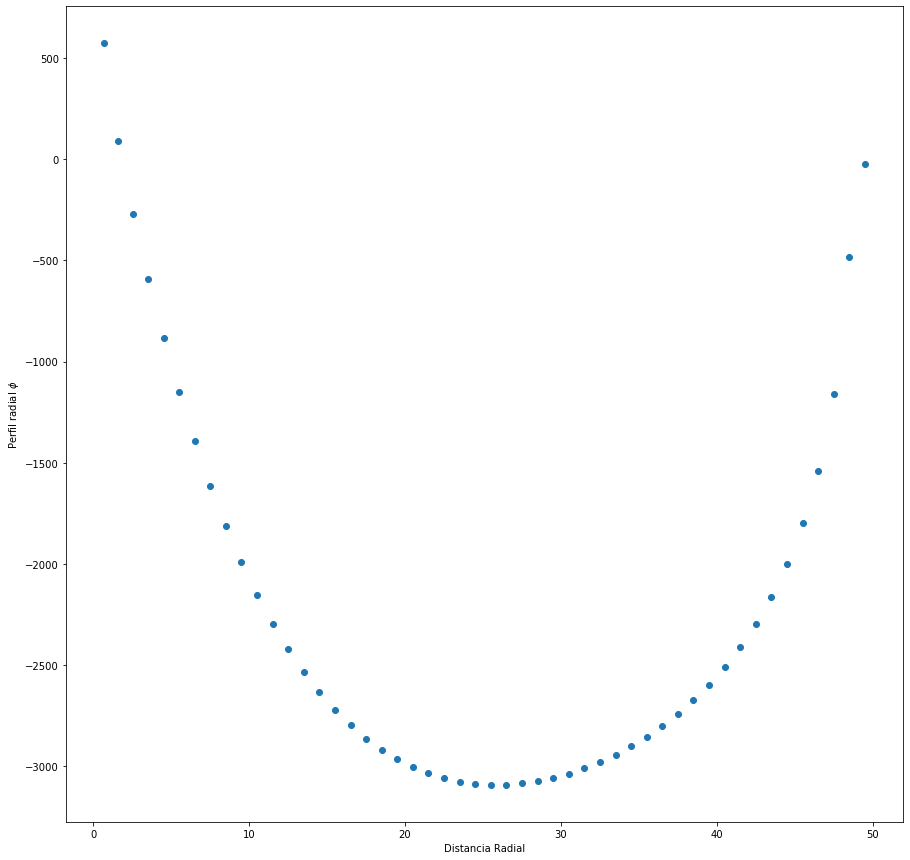

In [389]:
fig, ax = plt.subplots(figsize=(15, 15))

plt.xlabel('Distancia Radial')
plt.ylabel('Perfil radial $\phi$')

plt.scatter(dist[50][50:],perf_rad_x)

In [390]:
potencial = np.zeros((mp.values.shape[0],mp.values.shape[1])) #matriz de potenciales
for i in range(mp.values.shape[0]):
    for j in range(mp.values.shape[1]):
        #print(i-cx,j-cy, np.sqrt((i-cx)**2+(j-cy)**2))
        potencial[i][j] = perfil_radial(dist[i][j])
print(potencial)

[[-25.58381964 -25.58381964 -25.58381964 ... -25.58381964 -25.58381964
  -25.58381964]
 [-25.58381964 -25.58381964 -25.58381964 ... -25.58381964 -25.58381964
  -25.58381964]
 [-25.58381964 -25.58381964 -25.58381964 ... -25.58381964 -25.58381964
  -25.58381964]
 ...
 [-25.58381964 -25.58381964 -25.58381964 ... -25.58381964 -25.58381964
  -25.58381964]
 [-25.58381964 -25.58381964 -25.58381964 ... -25.58381964 -25.58381964
  -25.58381964]
 [-25.58381964 -25.58381964 -25.58381964 ... -25.58381964 -25.58381964
  -25.58381964]]


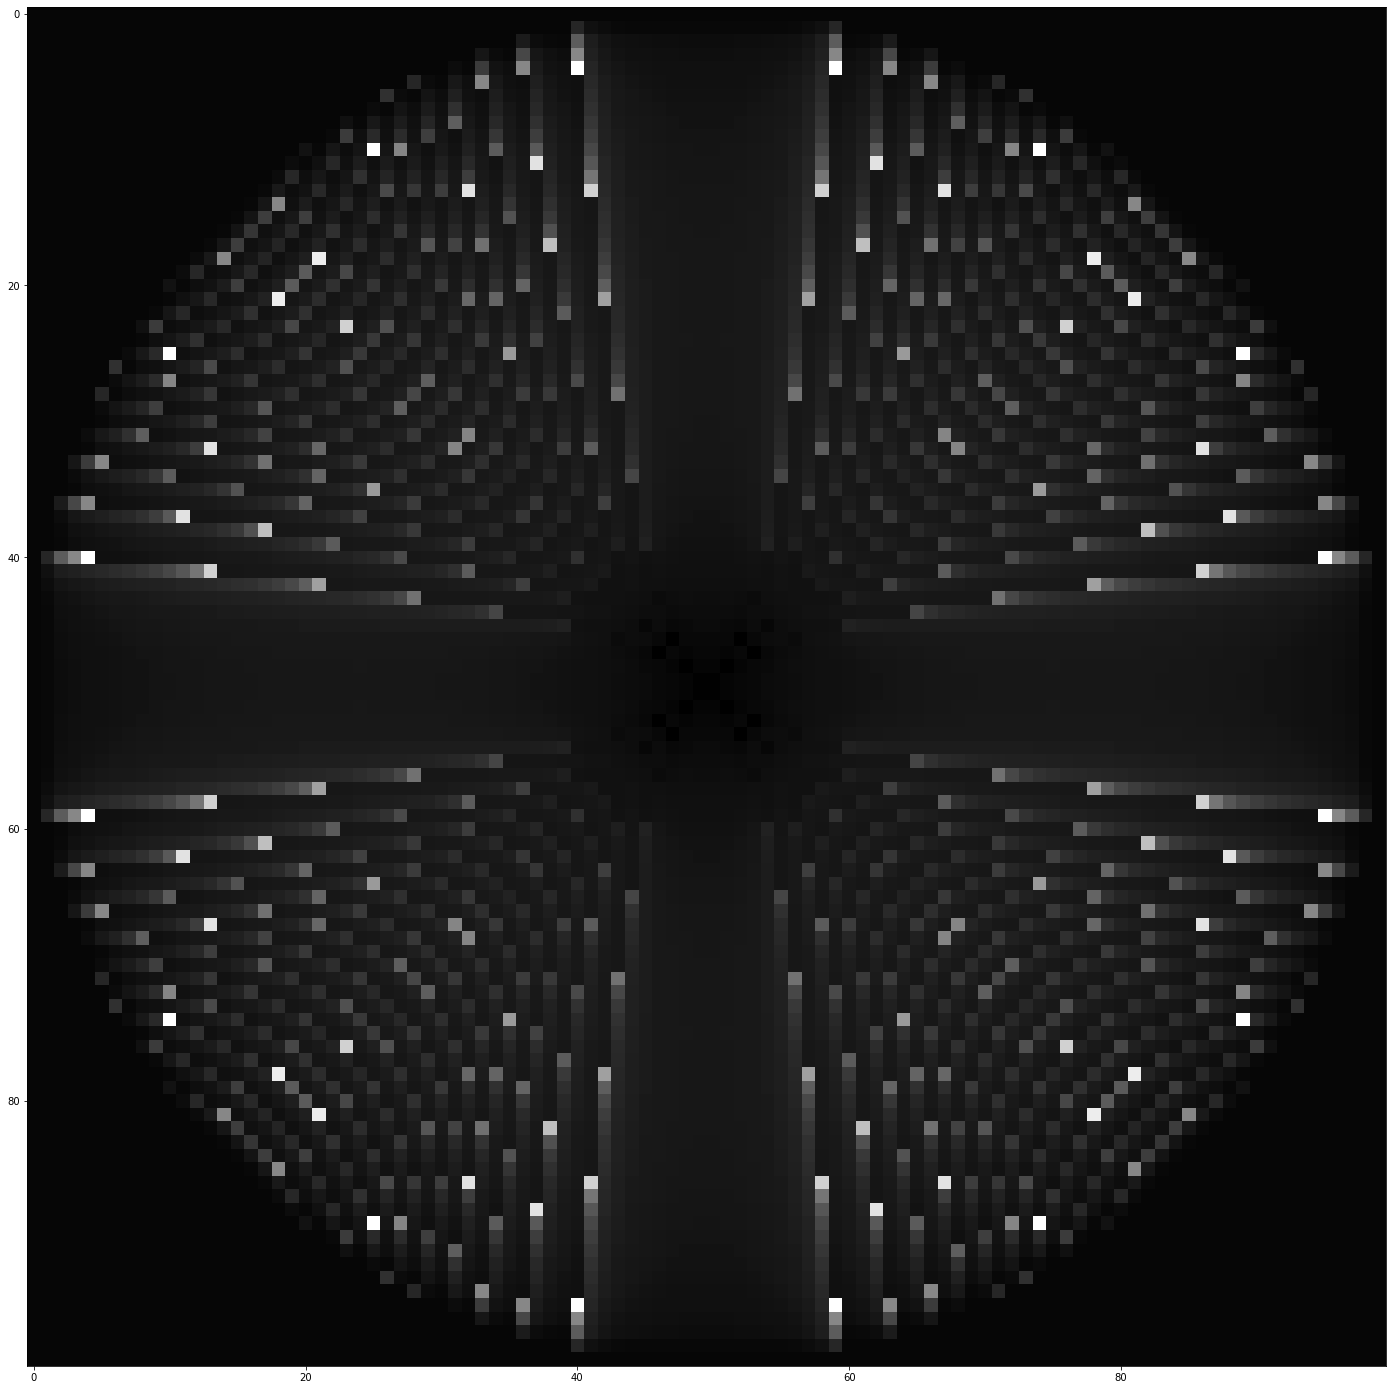

In [391]:
fig, ax = plt.subplots(figsize=(25, 25))
plt.imshow(potencial, cmap='binary')
plt.show()

5. la velocidad está dada por $$\cfrac{V^2_{cir}(r)}{r}=a_{grav}=-\nabla(\phi)$$
Como la derivada es radial y como la aceleración también, entonces se toma solo la magnitudpara hallar la velocidad circular.

In [392]:
vel_x = np.sqrt(dist[50][50:]*(perf_rad_x)*-1)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


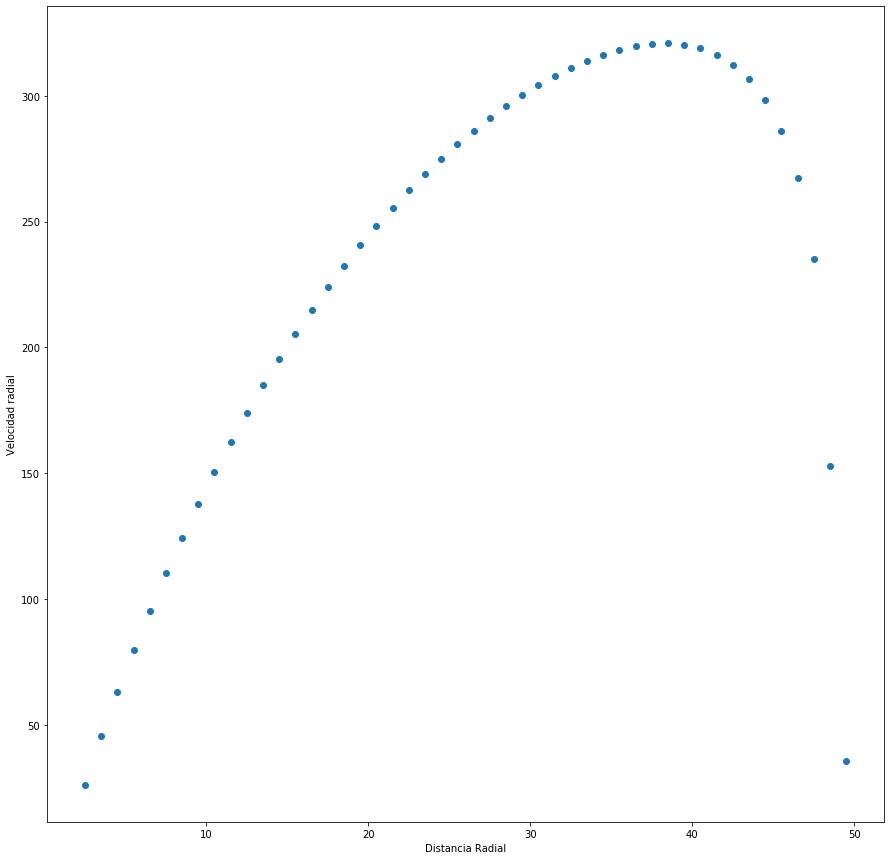

In [393]:
fig, ax = plt.subplots(figsize=(15, 15))

plt.xlabel('Distancia Radial')
plt.ylabel('Velocidad radial')

plt.scatter(dist[50][50:],vel_x)

In [394]:
velocidad = np.zeros((mp.values.shape[0],mp.values.shape[1])) #matriz de potenciales
for i in range(mp.values.shape[0]):
    for j in range(mp.values.shape[1]):
        #print(i-cx,j-cy, np.sqrt((i-cx)**2+(j-cy)**2))
        velocidad[i][j] = np.sqrt(dist[i][j]*(potencial[i][j])*-1)
print(velocidad)

[[42.3197205  42.10653806 41.89451896 ... 41.89451896 42.10653806
  42.3197205 ]
 [42.10653806 41.89006754 41.67471038 ... 41.67471038 41.89006754
  42.10653806]
 [41.89451896 41.67471038 41.45596186 ... 41.45596186 41.67471038
  41.89451896]
 ...
 [41.89451896 41.67471038 41.45596186 ... 41.45596186 41.67471038
  41.89451896]
 [42.10653806 41.89006754 41.67471038 ... 41.67471038 41.89006754
  42.10653806]
 [42.3197205  42.10653806 41.89451896 ... 41.89451896 42.10653806
  42.3197205 ]]


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


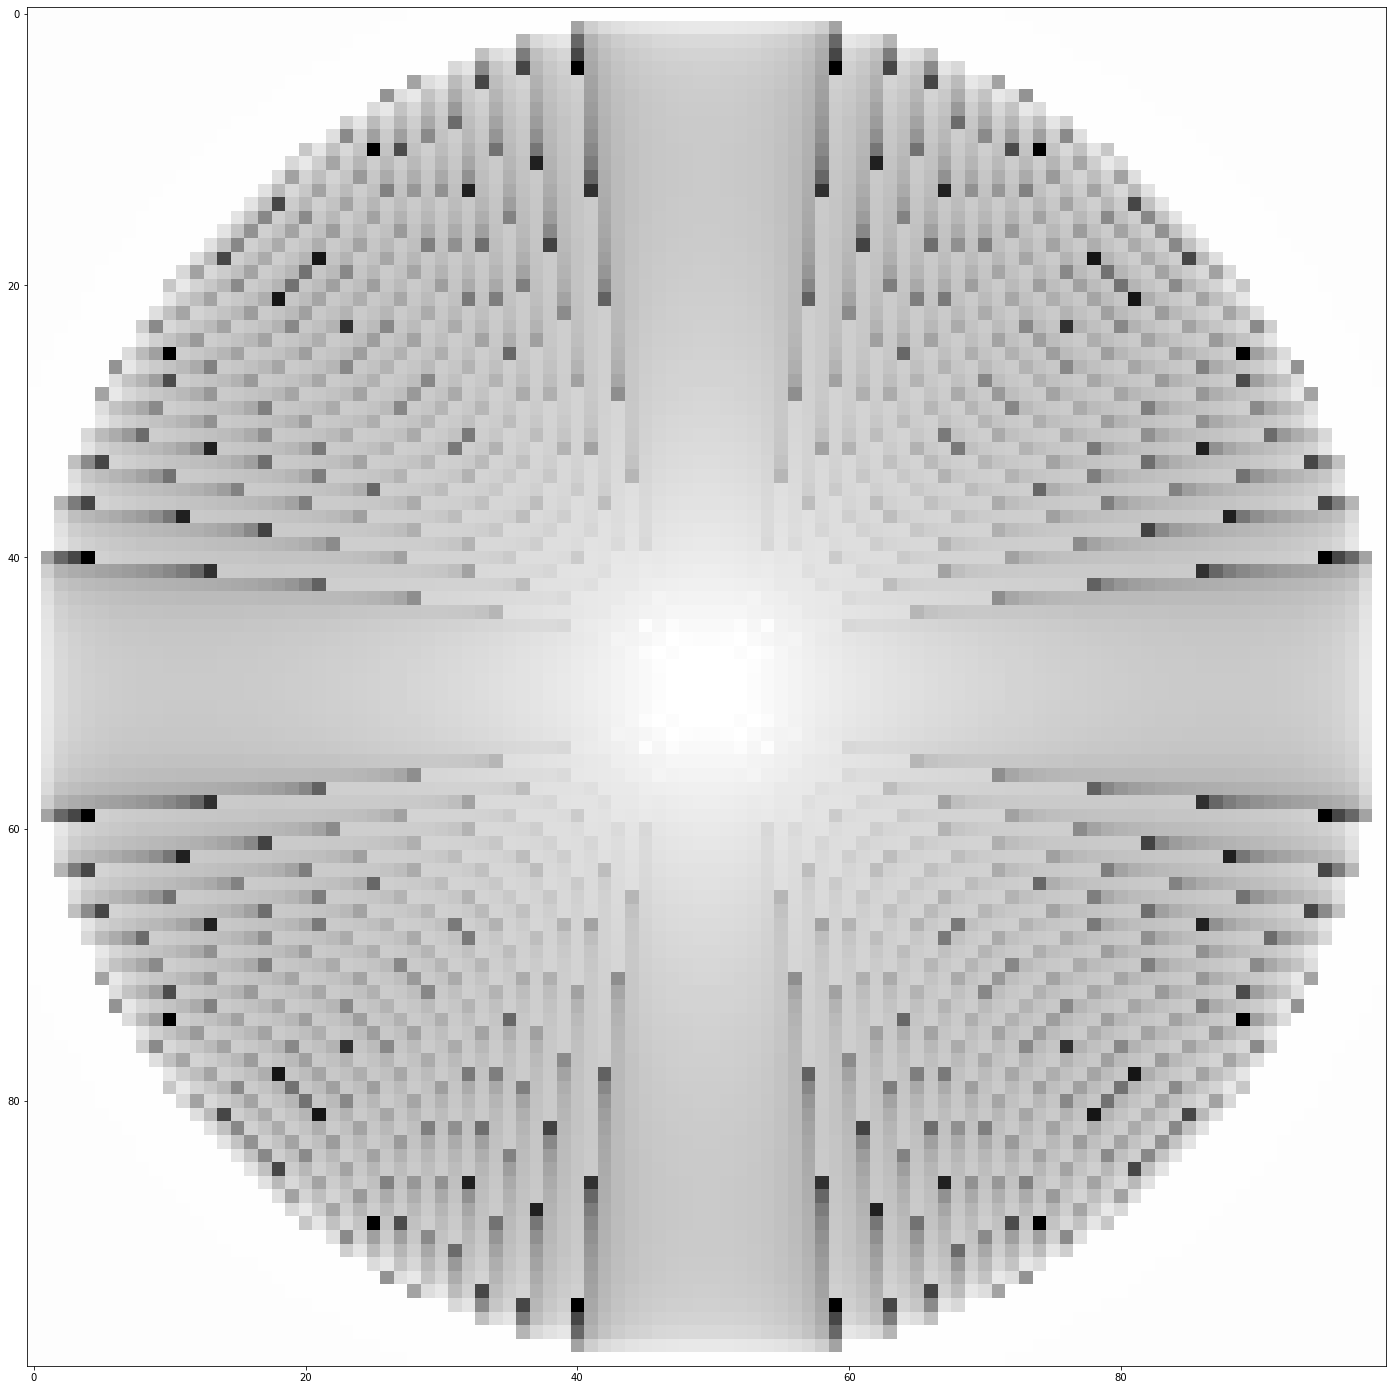

In [395]:
fig, ax = plt.subplots(figsize=(25, 25))
plt.imshow(velocidad, cmap='binary')
plt.show()